
# Анализ данных с Python
    

## Цели

После завершения этой лаборатории вы сможете:

* Исследуйте функции или шариктеристики для прогнозирования цены на автомобиль


<h2> Соблюдение </h2>

<div class = "оповещение о блоке Alert-info" style = "margin-top: 20px">
<ol>
    <li> <a href="#import_data"> импорт данных из модуля </a> </li>
    <li> <a href="#pattern_visualization"> Анализ индивидуальных шаблонов функций с использованием визуализации </a> </li>
    <li> <a href="#discriptive_statistics"> Описательный статистический анализ </a> </li>
    <li> <a href="#basic_grouping"> Основы группировки </a> </li>
    <li> <a href="#correlation_causation"> Корреляция и причинно -следственная связь </a> </li>
    <li> <a href="#anova"> anova </a> </li>
</ol>

</div>
 
<hr>


<h3> Каковы основные характеристики, которые оказывают наибольшее влияние на цену автомобиля? </h3>


<h2 id = "import_data"> 1.Импорт данных из модуля 2 </h2>


<h4> НАСТРОЙКИ </h4>


Импорт библиотеки:

In [239]:
import pandas as pd
import numpy as np

Загрузим данные которые предварительно обработаны и сохранены локально и сохраните их в DataFrame  с помощью метода чтения ссв файлов в переменную `df`:


In [240]:
df = pd.read_csv('C:/Users/admin/Desktop/python repo/DataAnalysis/Labs/clean_df.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,13495.0,11.190476,8.703704,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,16500.0,11.190476,8.703704,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,13950.0,9.791667,7.833333,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,17450.0,13.055556,10.681818,Low,0,1,1,0


In [241]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    int64  
 2   make               199 non-null    object 
 3   num-of-doors       199 non-null    object 
 4   body-style         199 non-null    object 
 5   drive-wheels       199 non-null    object 
 6   engine-location    199 non-null    object 
 7   wheel-base         199 non-null    float64
 8   length             199 non-null    float64
 9   width              199 non-null    float64
 10  height             199 non-null    float64
 11  curb-weight        199 non-null    int64  
 12  engine-type        199 non-null    object 
 13  num-of-cylinders   199 non-null    object 
 14  engine-size        199 non-null    int64  
 15  fuel-system        199 non-null    object 
 16  bore               199 non

## **Параметры автомобилей**
марка автомобиля **(Make)**

аспирация **(aspiration)**

количество дверей **(num-of-doors)**

стиль кузова **(body-style)**

ведущие колеса	**(drive-wheels)**

расположение двигателя (**engine-location)**

колёсная база 	**(wheel-base)**

длина автомобиля **(length)**

степень сжатия	двигателя **(compression-ratio)**

лошадиная сила автомобиля	**(horsepower)**

пиковые обороты	**(peak-rpm)**

расход галлонов топлива на милю по городу	**(city-mpg)**

расход галлонов топлива на милю по шоссе	**(highway-mpg)**

цена автомобиля	**(price)**

мощность в лошадиных силах	**(horsepower-binned)** что то типа рейтинга, в градация мало, много, средне, относительно количественного показателя выборки в столбце лошадиные силы

дизель	**(diesel)** - дизельный автомобиль

газ **(gas)** - автомобиль на газу 

<h2 id = "pattern_visualization"> 2.Анализ отдельных шаблонов функций с использованием визуализации </h2>


Чтобы установить Seaborn, мы используем PIP, менеджер пакетов Python.


Импортируем пакеты визуализации "matplotlib" и "Seaborn".Не забывайте о том, что «%матплотлиб встроен», чтобы он построить в ноутбуке Юпитера.

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

<h4> Как выбрать правильный метод визуализации? </h4>
<p> При визуализации отдельных переменных важно сначала понять, с какой типом переменной я имею дело. Это поможет нам найти правильный метод визуализации для этой переменной. Понять она качественная или количественная </P>

In [244]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
aspiration-std         int64
aspiration-turbo       int64
dtype: object


<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h3> Вопрос № 1: </h3>

<b> Каков тип данных столбца «пиковые обороты **(peak-rpm)**»?</b>
</div>

In [245]:
# Write your code below and press Shift+Enter to execute 
df['peak-rpm'].dtypes

dtype('float64')

мы можем рассчитать корреляцию между переменными типа «int64» или «float64», используя метод «corr»:
Применим метод corr  и выведем все на экран



In [246]:
df.corr()

C:\Users\admin\AppData\Local\Temp/ipykernel_3808/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.437710,-0.537706,-0.365957,-0.243933,-0.546717,-0.232893,-0.111110,-0.181151,-0.017215,-0.182446,0.076038,0.280635,-0.082465,0.066253,-0.029590,-0.197062,0.197062,0.054255,-0.054255
normalized-losses,0.437710,1.000000,0.001924,0.089020,0.116238,-0.325298,0.165026,0.144756,0.012198,0.075000,-0.112131,0.262314,0.203707,0.189412,0.282367,0.216880,-0.084370,0.084370,-0.031134,0.031134
wheel-base,-0.537706,0.001924,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.503402,0.172975,0.249088,0.371621,-0.360593,0.583797,0.477141,0.577205,0.306224,-0.306224,-0.255331,0.255331
length,-0.365957,0.089020,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.609668,0.119782,0.161486,0.580309,-0.286321,0.693965,0.657629,0.709066,0.212862,-0.212862,-0.232461,0.232461
width,-0.243933,0.116238,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.538479,0.186652,0.191254,0.615315,-0.245975,0.753871,0.673398,0.738137,0.245669,-0.245669,-0.307704,0.307704
height,-0.546717,-0.325298,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.222436,-0.048242,0.259914,-0.087407,-0.311574,0.134990,0.004241,0.083821,0.281983,-0.281983,-0.089146,0.089146
curb-weight,-0.232893,0.165026,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.642652,0.173495,0.156294,0.758063,-0.279375,0.835090,0.785547,0.837088,0.220954,-0.220954,-0.322009,0.322009
engine-size,-0.111110,0.144756,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.596158,0.212432,0.029366,0.822713,-0.256773,0.873887,0.745026,0.784091,0.071237,-0.071237,-0.110750,0.110750
bore,-0.181151,0.012198,0.503402,0.609668,0.538479,0.222436,0.642652,0.596158,1.000000,-0.061945,0.007731,0.555296,-0.308700,0.539340,0.507473,0.524445,0.063490,-0.063490,-0.238700,0.238700
stroke,-0.017215,0.075000,0.172975,0.119782,0.186652,-0.048242,0.173495,0.212432,-0.061945,1.000000,0.200386,0.099300,-0.071866,0.093765,0.028851,0.049185,0.254507,-0.254507,-0.234612,0.234612


по оси х и по оси н расположены наименования столбцов, бля понимания зависимостей
**определим корреляцию, более точно, корреляцией Пирсона**


In [247]:
# Выберем наиболее высокую отрицательную корреляцию
corr_matrix = df.corr()
price_corr = corr_matrix['price'].sort_values(ascending=True).head(5)
price_corr
# Интересной нам отрицательной корреляции нет

C:\Users\admin\AppData\Local\Temp/ipykernel_3808/2248169141.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


aspiration-std      -0.177821
fuel-type-gas       -0.108978
peak-rpm            -0.101649
symboling           -0.082465
compression-ratio    0.069549
Name: price, dtype: float64

In [248]:
# Выберем наиболее высокую положительную корреляцию
corr_matrix_positive = df.corr()
price_corr = corr_matrix_positive['price'].sort_values(ascending=False).head(10)
price_corr

C:\Users\admin\AppData\Local\Temp/ipykernel_3808/1352003392.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_positive = df.corr()


price              1.000000
engine-size        0.873887
curb-weight        0.835090
horsepower         0.810533
highway-L/100km    0.801059
city-L/100km       0.791270
width              0.753871
length             0.693965
wheel-base         0.583797
bore               0.539340
Name: price, dtype: float64

наибольшие корреляции с ценой у вышеуказаннх параметров, далее можно проверить, а эти параметры с чем коррелируют?

<p> Найдем корреляцию между столбцами: . </p>
<p> Для выборать эти столбцов, использую следующий синтаксис: <code>df [['столбец', 'столбец', 'столбец', 'столбец']].далее применяется метод</code> </p>
</div>

In [249]:
df[['curb-weight', 'engine-size', 'curb-weight', 'horsepower', 'highway-L/100km', 'city-L/100km']].corr()


,curb-weight,engine-size,curb-weight,horsepower,highway-L/100km,city-L/100km
curb-weight,1.000000,0.849301,1.000000,0.758063,0.837088,0.785547
engine-size,0.849301,1.000000,0.849301,0.822713,0.784091,0.745026
curb-weight,1.000000,0.849301,1.000000,0.758063,0.837088,0.785547
horsepower,0.758063,0.822713,0.758063,1.000000,0.840939,0.889518
highway-L/100km,0.837088,0.784091,0.837088,0.840939,1.000000,0.958945
city-L/100km,0.785547,0.745026,0.785547,0.889518,0.958945,1.000000


Эти параметры так же сильно взаимосвязаны

<h2> Непрерывные числовые переменные: </h2>

<p> Непрерывные числовые переменные - это переменные, которые могут содержать любое значение в некотором диапазоне.Они могут быть типа «int64» или «float64».Отличный способ визуализации этих переменных - это использование рассеянных диаграмм с установленными линиями. </P>

<p> Чтобы начать понимание (линейной) взаимосвязи между отдельной переменной и цены, мы можем использовать «Регулирование», которая располагает графиком рассеяния плюс установленная линия регрессии для данных.Позже это будет полезно для визуализации соответствия простой модели линейной регрессии.</p>


Посмотрим несколько примеров различных линейных отношений:


<h3>Positive Linear Relationship</h4>


Давайте найдем диаграмму рассеяния «размер двигателя» и «цены». Так как это самый коррелируемый параметр
библиотека SEaborn импортирована как SNS
 ### sns.тип_графика (x ='столбец1', y= 'столбец2', data = df)


(0.0, 53449.51434074111)

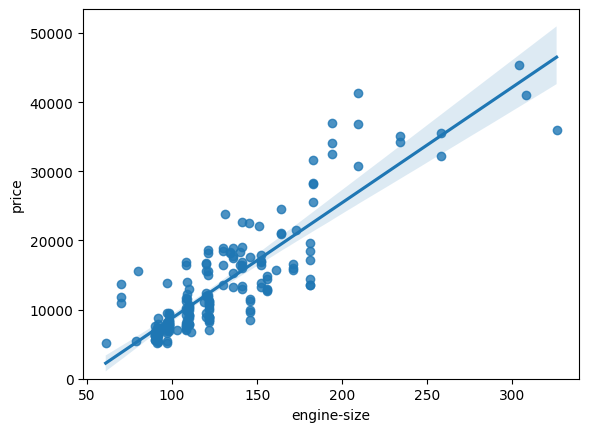

In [250]:
# самые коррелируемые с ценой параметры будут являться потенциальными предикторами для нашей зависимой переменной
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

 По мере увеличения размера двигателя цена возрастает: это указывает на положительную прямую корреляцию между этими двумя переменными.
#### Размер двигателя кажется довольно хорошим предиктором (предсказывающим показателем) цены, поскольку линия регрессии почти идеальная диагональная линия. 


Мы можем исследовать корреляцию между «размером с двигателя» и «ценой» и увидим, что она составляет приблизительно 0,87.

**df[['column1', 'column2']].metod_name()**


In [251]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.873887
price,0.873887,1.000000


Расход топлива так же является потенциальной переменной предиктором для цены .Давайте построим диаграмму рассеяния 'highway-L/100km', 'city-L/100km' и "Price".
 ### sns.тип_графика (x ='столбец1', y= 'столбец2', data = df)


<Axes: xlabel='highway-L/100km', ylabel='price'>

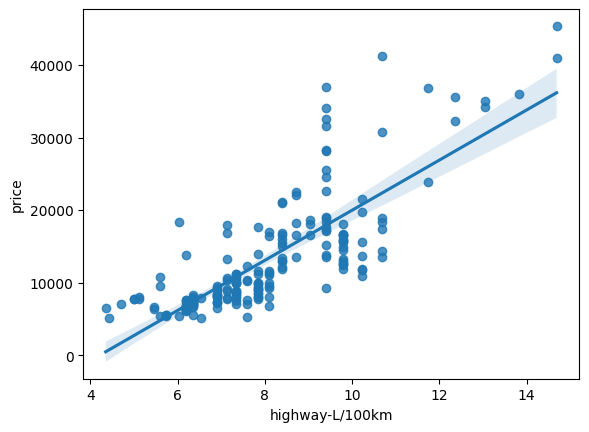

In [252]:
sns.regplot(x="highway-L/100km", y="price", data=df)

Как ни странно, чем больше потребляет литров автомобиль, тем выше его цена, хотя это показатель не экономичности, но этот показатель сильно коррелирует с размером двигателя, который в свою очередь наш первый предиктор

<Axes: xlabel='highway-L/100km', ylabel='engine-size'>

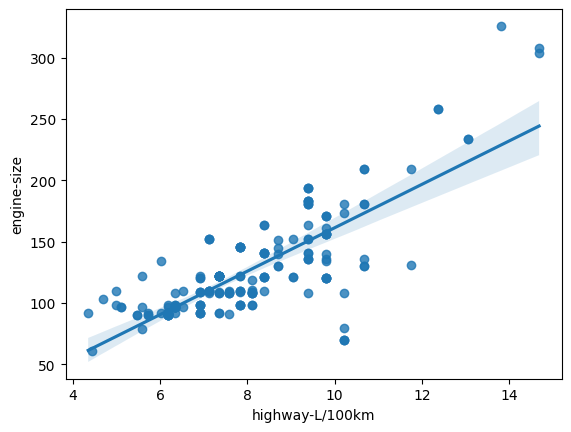

In [253]:
sns.regplot(x="highway-L/100km", y="engine-size", data=df)

<h3>Weak Linear Relationship</h3>


Давайте посмотрим, является ли «пиковые обороты» переменной предиктора «цены».
 ### sns.тип_графика (x ='столбец1', y= 'столбец2', data = df)


<Axes: xlabel='peak-rpm', ylabel='price'>

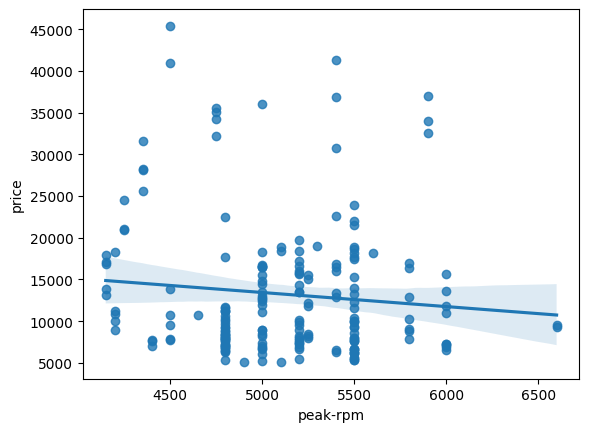

In [254]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p> Пик RPM не кажется хорошим предиктором цены вообще, поскольку линия регрессии близка к горизонтали.Кроме того, точки данных очень разбросаны и далеки от установленной линии, показывая много изменчивости.Следовательно, это не надежная переменная. </P>

In [255]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101649
price,-0.101649,1.000000


## категориальные переменные

<p> Это переменные, которые описывают «характеристику» блока данных и выбираются из небольшой группы категорий.Категориальные переменные могут иметь тип «объект» или «int64».Хороший способ визуализации категориальных переменных - это использование боксов. </P>


Давайте посмотрим на отношения между «стилем тела» и «ценой».
стилей тела у нас несколько. посмотрм какие самые дорогие , какие разбежки цен

 ### sns.тип_графика (x ='столбец1', y= 'столбец2', data = df)


In [256]:
df['body-style'].head()

0    convertible
1    convertible
2      hatchback
3          sedan
4          sedan
Name: body-style, dtype: object

<Axes: xlabel='body-style', ylabel='price'>

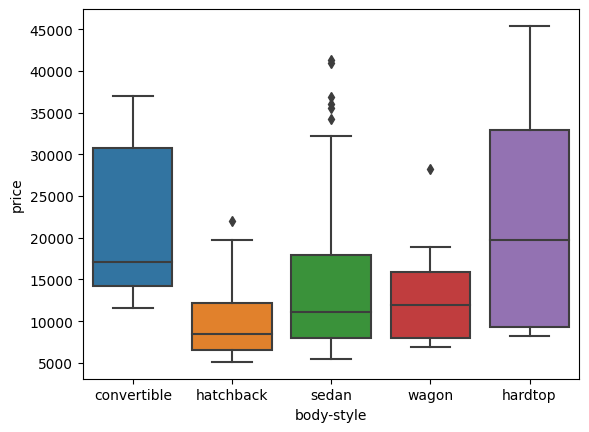

In [257]:
sns.boxplot(x="body-style", y="price", data=df)

<p> Мы видим, что распределение цен между различными категориями в стиле тела имеет значительное совпадение, поэтому стиль тела не будет хорошим предиктором цены. Единственное, хардтопы  и кабриолеты имеют самую высокую цену.

Давайте рассмотрим двигатель «локация двигателя» и «Цена»: </p>

<Axes: xlabel='engine-location', ylabel='price'>

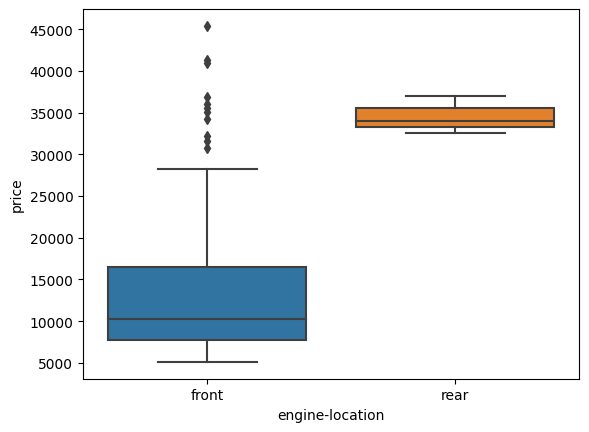

In [258]:
sns.boxplot(x="engine-location", y="price", data=df)

<p> Здесь мы видим, что распределение цены между этими двумя категориями размещения двигателя, спереди и сзади, достаточно различны, чтобы взять на себя размещение двигателя в качестве потенциального хорошего предиктора цены.  но теперь я знаю что все автомобили с двигателем сзади в среднем стоят дороже, а точнее начало их ценовой категории лежит в за пределами максимальных значений переднедвигательных машин</p>

Давайте рассмотрим «приводные колеса» и «цена».


<Axes: xlabel='drive-wheels', ylabel='price'>

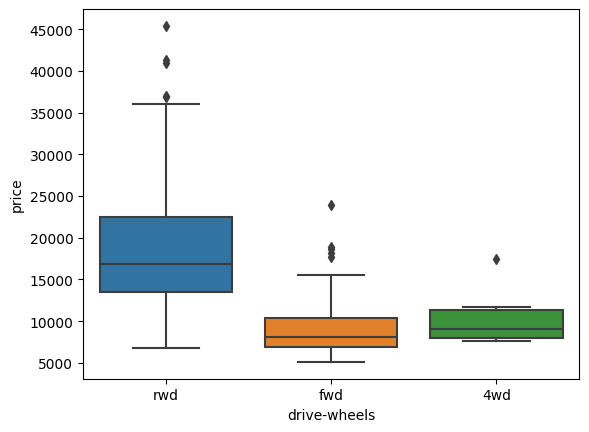

In [259]:
# Drive-Weels
sns.boxplot(x="drive-wheels", y="price", data=df)

**Здесь мы видим, что распределение цены между различными категориями дисководов отличается.**

**Таким образом, ведущие колеса могут потенциально быть предиктором цены.**


<h2 id = "disciptive_statistics"> 3.Описательный статистический анализ </h2>

<p> Давайте сначала посмотрим на переменные, используя метод описания. df.describe() </p>

<p> Функция <b> описать </b> автоматически вычисляет основную статистику для всех непрерывных переменных.Любые значения NAN автоматически пропускаются в этой статистике. </P>

Это покажет:
<ul>
    <li> Подсчет этой переменной </li>
    <li> Среднее </li>
    <li> Стандартное отклонение (Std) </li>
    <li> Минимальное значение </li>
    <li> IQR (межквартильный диапазон: 25%, 50%и 75%) </li>
    <li> Максимальное значение </li>
<ul>

Мы можем применить метод «describe» следующим образом:


In [260]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,0.839196,123.854271,98.824121,0.836863,0.915034,0.899262,2556.030151,126.824121,3.322764,3.249296,10.178995,103.396985,5117.587940,13243.432161,9.941399,8.049623,0.100503,0.899497,0.819095,0.180905
std,1.257009,34.572335,6.090838,0.059452,0.029319,0.040920,519.855544,41.752932,0.273067,0.311006,4.022424,37.553843,480.521824,7978.707609,2.547219,1.849417,0.301427,0.301427,0.385910,0.385910
min,-2.000000,65.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,95.000000,94.500000,0.800336,0.890278,0.869565,2157.000000,97.500000,3.140000,3.110000,8.550000,70.000000,4800.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,10345.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,150.000000,102.400000,0.881788,0.926389,0.928930,2930.500000,143.000000,3.585000,3.410000,9.400000,116.000000,5500.000000,16501.500000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


Настройка по умолчанию"describe" Пропускает переменные объекта типа.Мы можем применить метод "describe" о переменных типа «объект» следующим образом:


In [261]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,199,199,199,199,199,199,199,199,199
unique,21,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,114,94,116,196,143,155,90,151


При описании категориальных переменных мы видим, что:

- есть 21 уникальная марки авто в выборке. 
- Самая популярная это тойота
- есть 5 стилей кузовов
- есть 6 размеров двигателей
- 7 разных количеств цииндров 
- 8 различгных типов систем распределения топлива
- так же топовые характеристики(самые часто встречающиеся в каждой категории и как часто они встречаются)

<h3>Value Counts</h3>


<p> Подсчет значений - хороший способ понять, сколько единиц каждой характеристики/переменной у нас.Мы можем применить метод «value_counts» на столбце «Drive-Weels».Не забывайте метод «value_counts» работает только в серии Pandas, а не Pandas DataFrames.В результате мы включаем только один кронштейн <code> df ['Drive-Wheels'] </code>, а не два кронштейна <code> df [['Drive-Wheels']] </code>. </P>


In [262]:
df['drive-wheels'].value_counts()

fwd    116
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Мы можем преобразовать серию в DataFrame следующим образом:


In [263]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,116
rwd,75
4wd,8


Давайте повторим приведенные выше шаги, но сохраните результаты в DataFrame "Drive_wheels_counts" и переименованы столбцом "Drive-Weels" до 'value_counts'.


In [264]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,116
rwd,75
4wd,8


Теперь давайте переименовать индекс в «колеса»:


In [265]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,116
rwd,75
4wd,8


Мы можем повторить приведенный выше процесс для переменной «расположение двигателя».


In [266]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,196
rear,3


**После изучения количества значений местоположения двигателя мы видим, что расположение двигателя не будет хорошей переменной предиктора по цене.Это потому, что у нас есть только три автомобиля с задним двигателем и 196 с двигателем спереди, так что этот результат искажен.Таким образом, мы не можем сделать никаких выводов о расположении двигателя.** </P>** мы подтвердили предыдущий боксплот. у нас не хватает данных по ценам  редких расположений двигателя

<h2 id = "basic_grouping"> 4.Основы группировки </h2>


<p> Группы методов "GroupBy" по разным категориям.Данные сгруппированы на основе одной или нескольких переменных, а анализ проводится на отдельных группах. </P>

<p> Например, давайте группируем с переменной "ведущие колеса" . Мы видим, что есть 3 разные категории дисководов. </P>

In [267]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p> Если мы хотим в среднем знать, какой тип приводного колеса наиболее ценен, мы можем группировать «приводные колеса», а затем ввычислить среднюю цену каждой категории </p>

<p> Мы можем выбрать столбцы «дисководы», «стиль тела» и «цена», а затем назначить их переменной "df_group_one". </p>

In [268]:
df_group_one = df[['drive-wheels','body-style','price']]

Затем мы можем рассчитать среднюю цену для каждой из различных категорий данных.

In [269]:
# сгруппируем и получим среднюю цену каждой категории
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

C:\Users\admin\AppData\Local\Temp/ipykernel_3808/2796006601.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9238.741379
2,rwd,19757.613333


<p> Из наших данных кажется, что транспортные средства для заднего привода в среднем являются самыми дорогими, а 4-х колеса и переднее колесо примерно одинаковы по цене. </p>

<p> Вы также можете группировать по нескольким переменным.Например, Let's Group от «Drive-Weels» и «Body Style».Это группирует DataFrame с помощью уникальной комбинации «типа ведущих колес» и «кузова». Мы можем сохранить результаты в переменной 'Grupered_test1'. </P>


In [270]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8365.166667
6,fwd,sedan,9811.800000
7,fwd,wagon,10061.181818
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<p> Эти сгруппированные данные намного проще визуализировать, когда они перевернуты.Таблица поворота похожа на электронную таблицу Excel, с одной переменной вдоль столбца и другой вдоль строки.Мы можем преобразовать DataFrame в таблицу поворота, используя метод «Pivot», чтобы создать поворотную таблицу из групп. </P>.

<p> В этом случае мы оставим переменную приводной колеса в качестве рядов таблицы, и стиль поворота, чтобы стать столбцами таблицы: </p>


In [271]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8365.166667   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd           10061.181818  
rwd           16994.222222

<p> Часто у нас не будет данных для некоторых поворотных ячеек.Мы можем заполнить эти пропущенные ячейки значением 0, но любое другое значение также может быть использовано.Следует отметить, что отсутствующие данные являются довольно сложным предметом и являются целым курсом самостоятельно. </P>


In [272]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8365.166667   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd           10061.181818  
rwd           16994.222222

<div class = "оповещение о том, что AlertDanger" Style = "Margin-Top: 20px">
<h1> Вопрос 4: </h1>

<p> Используйте функцию «GroupBy», чтобы найти среднюю «цену» каждого автомобиля на основе «стиля кузова». </p>
</div>


In [273]:
# Write your code below and press Shift+Enter to execute 
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9958.373134
3,sedan,14459.755319
4,wagon,12500.166667


Если вы не импортировали «pyplot», давайте сделаем это снова.


In [274]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4> Переменные: диски и стиль кузова против цены </h4>


Давайте используем тепловую карту, чтобы визуализировать взаимосвязь между стилем кузова и ценой.


<p> Тепловая карта определяет целевую переменную (цену), пропорциональную цвету по отношению к переменным «приводное колесо» и «стиль тела» по вертикальной и горизонтальной оси, соответственно.Это позволяет нам визуализировать, как цена связана с «приводным колесом» и «в стиле тела». </P>

Сначала мы создаем объектs figure_obj, axis_piv с помощью метода subplots(). Затем мы используем метод pcolor() для создания тепловой карты на основе сводной таблицы grouped_pivot. 
Мы также указываем цветовую схему cmap='RdBu', которая будет использоваться для отображения значений на тепловой карте.

Затем мы создаем метки для строк и столбцов тепловой карты, используя методы grouped_pivot.columns.levels[1] и grouped_pivot.index. Мы устанавливаем метки для осей x и y с помощью методов set_xticklabels() и set_yticklabels(), а также устанавливаем метки для делений осей x и y с помощью методов set_xticks() и set_yticks().

Далее мы поворачиваем метки оси x на 90 градусов с помощью метода plt.xticks(rotation=90).

Затем мы добавляем цветовую шкалу к тепловой карте с помощью метода colorbar(), чтобы показать соответствие между цветами и значениями на тепловой карте.

Наконец, мы отображаем тепловую карту с помощью метода plt.show().


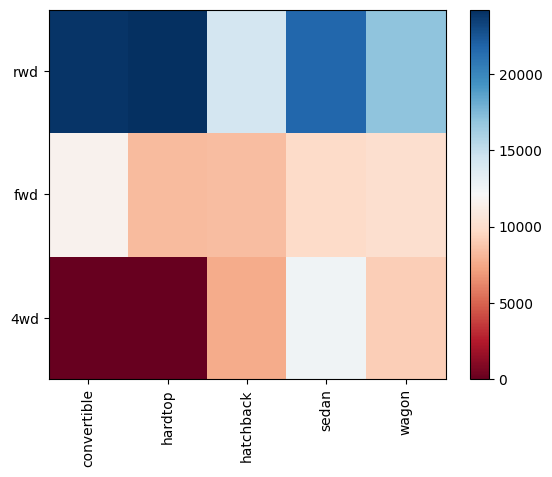

In [275]:
figure_obj, axis_piv = plt.subplots()
im = axis_piv.pcolor(grouped_pivot, cmap='RdBu')


row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index


axis_piv.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
axis_piv.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)


axis_piv.set_xticklabels(row_labels, minor=False)
axis_piv.set_yticklabels(col_labels, minor=False)


plt.xticks(rotation=90)

figure_obj.colorbar(im)
plt.show()

<code>axis_piv.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)</code> устанавливает метки на оси x. 

<code>np.arange(grouped_pivot.shape[1])</code> создает массив чисел от 0 до количества столбцов в grouped_pivot, а + 0.5 смещает метки на половину ширины каждого столбца, чтобы они были по центру. minor=False указывает, что метки должны быть основными метками на оси x.

<code>axis_piv.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)</code> устанавливает метки на оси y. 

<code>np.arange(grouped_pivot.shape[0])</code> создает массив чисел от 0 до количества строк в grouped_pivot, а + 0.5 смещает метки на половину высоты каждой строки, чтобы они были по центру. minor=False указывает, что метки должны быть основными метками на оси y. 




<p> Основной вопрос, на который мы хотим ответить в этом модуле: «Каковы основные характеристики, которые оказывают наибольшее влияние на цену автомобиля?». </p>

<p> Чтобы получить лучшую меру важных характеристик, мы смотрим на корреляцию этих переменных с ценой автомобиля.Другими словами: как цена автомобиля зависит от этой переменной? </P>


<h2 id = "correlation_causation"> 5.Корреляция и причинно -следственная связь </h2>


<p> <b> Корреляция </b>: мера степени взаимозависимости между переменными. </p>

<p> <b> причинно -следственная связь </b>: взаимосвязь между причиной и следствием между двумя переменными. </p>

<p> Важно знать разницу между этими двумя понятиями.Корреляция не подразумевает причинно -следственную связь.
Определение корреляции намного проще. Определяющая причинность как причинно -следственная связь может потребовать независимых экспериментов. </P>


<p> <b> корреляция Пирсона </b> </p>
<p> Корреляция Пирсона измеряет линейную зависимость между двумя переменными x и y. </p>
<p> Полученный коэффициент является значением между -1 и 1 включительно, где: </p>
<ul>
    <li> <b> 1 </b>: идеальная положительная линейная корреляция. </li>
    <li> <b> 0 </b>: нет линейной корреляции, две переменные, скорее всего, не влияют друг на друга. </li>
    <li> <b> -1 </b>: идеальная отрицательная линейная корреляция. </li>
</ul>

<p> Корреляция Пирсона - это метод по умолчанию функции «corr».Как и раньше, мы можем рассчитать корреляцию Пирсона с переменными «int64» или «float64». </P>


In [276]:
df.corr()

C:\Users\admin\AppData\Local\Temp/ipykernel_3808/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.437710,-0.537706,-0.365957,-0.243933,-0.546717,-0.232893,-0.111110,-0.181151,-0.017215,-0.182446,0.076038,0.280635,-0.082465,0.066253,-0.029590,-0.197062,0.197062,0.054255,-0.054255
normalized-losses,0.437710,1.000000,0.001924,0.089020,0.116238,-0.325298,0.165026,0.144756,0.012198,0.075000,-0.112131,0.262314,0.203707,0.189412,0.282367,0.216880,-0.084370,0.084370,-0.031134,0.031134
wheel-base,-0.537706,0.001924,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.503402,0.172975,0.249088,0.371621,-0.360593,0.583797,0.477141,0.577205,0.306224,-0.306224,-0.255331,0.255331
length,-0.365957,0.089020,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.609668,0.119782,0.161486,0.580309,-0.286321,0.693965,0.657629,0.709066,0.212862,-0.212862,-0.232461,0.232461
width,-0.243933,0.116238,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.538479,0.186652,0.191254,0.615315,-0.245975,0.753871,0.673398,0.738137,0.245669,-0.245669,-0.307704,0.307704
height,-0.546717,-0.325298,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.222436,-0.048242,0.259914,-0.087407,-0.311574,0.134990,0.004241,0.083821,0.281983,-0.281983,-0.089146,0.089146
curb-weight,-0.232893,0.165026,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.642652,0.173495,0.156294,0.758063,-0.279375,0.835090,0.785547,0.837088,0.220954,-0.220954,-0.322009,0.322009
engine-size,-0.111110,0.144756,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.596158,0.212432,0.029366,0.822713,-0.256773,0.873887,0.745026,0.784091,0.071237,-0.071237,-0.110750,0.110750
bore,-0.181151,0.012198,0.503402,0.609668,0.538479,0.222436,0.642652,0.596158,1.000000,-0.061945,0.007731,0.555296,-0.308700,0.539340,0.507473,0.524445,0.063490,-0.063490,-0.238700,0.238700
stroke,-0.017215,0.075000,0.172975,0.119782,0.186652,-0.048242,0.173495,0.212432,-0.061945,1.000000,0.200386,0.099300,-0.071866,0.093765,0.028851,0.049185,0.254507,-0.254507,-0.234612,0.234612


### Иногда мы хотели бы знать оценку значимости корреляции.


<b> p-value </b>
<p> Что это за значение p?P-значение-это значение вероятности, которое корреляция между этими двумя переменными является статистически значимой.Обычно мы выбираем уровень значимости 0,05, что означает, что мы 95% уверены, что корреляция между переменными является значительной. </P>

P-value (p-значение) - это вероятность получить наблюдаемое значение статистики при условии, что нулевая гипотеза верна. В контексте оценки значимости корреляции, нулевая гипотеза заключается в том, что корреляция между двумя переменными равна нулю, то есть переменные не коррелируют друг с другом.

P-value используется для определения статистической значимости корреляции. Если p-значение меньше уровня значимости (обычно 0.05), то мы можем отвергнуть нулевую гипотезу и сделать вывод о том, что между переменными существует статистически значимая корреляция. Если же p-значение больше уровня значимости, то мы не можем отвергнуть нулевую гипотезу и сделать вывод о том, что между переменными нет статистически значимой корреляции.

Например, если мы оцениваем корреляцию между доходом и расходами, то p-значение может помочь нам определить, насколько сильно доходы и расходы связаны друг с другом. Если p-значение меньше 0.05, то мы можем сделать вывод о том, что между доходами и расходами существует статистически значимая корреляция. Если же p-значение больше 0.05, то мы не можем сделать такой вывод и должны дополнительно исследовать данные, чтобы понять, почему корреляция между доходами и расходами не является статистически значимой.

**Нулевая гипотеза**- это утверждение, которое предполагает отсутствие статистически значимого эффекта или различия между двумя группами в исследовании. Она формулируется для того, чтобы проверить, насколько вероятно получить наблюдаемые результаты случайно, если никакого реального эффекта или различия между группами нет. Если нулевая гипотеза отвергается, то это означает, что наблюдаемые результаты статистически значимы и могут быть объяснены наличием реального эффекта или различия между группами.

По соглашению, когда
<ul>
    <li> p-значение составляет  <0,001 : мы говорим, что есть убедительные доказательства того, что корреляция значительна. </li>
    <li> P-значение составляет <0,05: есть умеренные доказательства того, что корреляция значительна. </li>
    <li> P-значение составляет  < 0,1 : есть слабые доказательства того, что корреляция значительна. </li>
    <li> p-значение составляет > 0,1 : нет никаких доказательств того, что корреляция значительна. </li>
</ul>


Мы можем получить эту информацию, используя модуль «статистики» в библиотеке "Scipy".

In [277]:
from scipy import stats

<h3> wheel-base (Колесная база) против цены </h3>


Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «колеса» и «цена».


In [278]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", "{:.6f}".format(p_value) )

The Pearson Correlation Coefficient is 0.5837967812893919  with a P-value of P = 0.000000


Данный код использует модуль stats из библиотеки scipy для вычисления коэффициента корреляции Пирсона между двумя переменными в DataFrame df. 

df['wheel-base'] и df['price'] - это две колонки (переменные) в DataFrame с именем df, между которыми мы хотим вычислить коэффициент корреляции.

**stats.pearsonr()** - это метод из модуля stats, который вычисляет **коэффициент корреляции Пирсона и p-value** для двух переменных. Он принимает два аргумента: первый аргумент - это массив значений первой переменной, а второй аргумент - это массив значений второй переменной.

**pearson_coef** - это переменная, которая хранит значение коэффициента корреляции Пирсона между двумя переменными.

**p_value**- это переменная, которая хранит p-value, который показывает статистическую значимость коэффициента корреляции. Если p-value меньше уровня значимости (обычно 0.05), то мы можем отвергнуть нулевую гипотезу о том, что коэффициент корреляции равен нулю, и считать, что между переменными есть статистически значимая связь.

print() - это функция вывода на экран. Она выводит сообщение о значении коэффициента корреляции Пирсона и p-value. 

Таким образом, данный код вычисляет коэффициент корреляции Пирсона между колонками 'wheel-base' и 'price' в DataFrame df и выводит его значение и p-value на экран.

<h3> Заключение: </h3>
<p><code> Поскольку p-значение составляет < 0,001, корреляция между базой и ценой является статистически значимой, хотя линейная взаимосвязь не чрезвычайно сильна (~ 0,585).</code> </p>


<h3> лошадиные силы против цены </h3>


Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «лошадиных сил» и «цены».


In [279]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", "{:.6f}".format(p_value) )  

The Pearson Correlation Coefficient is 0.8105330821322062  with a P-value of P =  0.000000


<h4> Заключение: </h4>

<p> Поскольку p-значение составляет < 0,001, корреляция между мощностью и ценой является статистически значимой, а линейная взаимосвязь довольно сильна (~ 0,809, близко к 1). </p>


<h3> длина против ценs </h3>

Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «длины» и «цены».


In [280]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", "{:.6f}".format(p_value))  

The Pearson Correlation Coefficient is 0.693964774564687  with a P-value of P =  0.000000


<h4> Заключение: </h4>
<p> Поскольку p-значение составляет  0,001 ( и даже меньше), корреляция между длиной и ценой является статистически значимой, а линейная связь умеренно сильна (~ 0,691). </p>


<h3> Ширина против цены </h3>


Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «ширины» и «цена»:


In [281]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", "{:.6f}".format(p_value) ) 

The Pearson Correlation Coefficient is 0.7538710519013431  with a P-value of P = 0.000000


#### Заключение:

Поскольку p-значение составляет <0,001, корреляция между шириной и ценой является статистически значимой, а линейная взаимосвязь довольно сильна (~ 0,751).


### вес автомобиля без пассажиров и груза против цены


Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «бордюрного веса» и «цена»:


In [282]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", "{:.6f}".format(p_value) )  

The Pearson Correlation Coefficient is 0.8350904472742752  with a P-value of P =  0.000000


<h4> Заключение: </h4>
<p> Поскольку p-значение составляет $ 0,001, корреляция между бордюром и ценой является статистически значимой, а линейная взаимосвязь довольно сильна (~ 0,834). </p>


<h3> Размер двигателя против цены </h3>

Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «размером с двигателя» и «цена»:

In [283]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", "{:.6f}".format(p_value)) 

The Pearson Correlation Coefficient is 0.8738869517981516  with a P-value of P = 0.000000


<h4> Заключение: </h4>

<p> Поскольку p-значение составляет $ 0,001, корреляция между размером двигателя и ценой является статистически значимой, а линейная взаимосвязь очень сильна (~ 0,872). </p>


<h3> отверстие цилиндра против цены </h3>


Давайте рассчитаем коэффициент корреляции Пирсона и p-значение «отверстия» и «цена»:


In [284]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", "{:.6f}".format(p_value) ) 

The Pearson Correlation Coefficient is 0.5393402020213779  with a P-value of P =   0.000000


<h4> Заключение: </h4>
<p> Поскольку p-значение составляет $ 0,001, корреляция между отверстием и ценой является статистически значимой, но линейная связь только умеренная (~ 0,521). </p>


Мы можем связать процесс для каждого «city-L/100km » и «highway-L/100km » и ценой:


<h3>city-L/100km  vs. Price</h3>


In [285]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", "{:.6f}".format(p_value))  

The Pearson Correlation Coefficient is 0.7912704789654205  with a P-value of P =  0.000000


<h4> Заключение: </h4>
<p> Поскольку p-значение составляет $ 0,001, корреляция является статистически значимой, а коэффициент около 0,79 показывает, что отношения являются  сильными. </p>


<h3> highway-L/100km против цены </h3>


In [286]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ","{:.6f}".format(p_value) ) 

The Pearson Correlation Coefficient is 0.8010587039365116  with a P-value of P =  0.000000


#### Заключение:
Поскольку p-значение составляет <0,001, корреляция между highway-L/100km и ценой является статистически значимой, а коэффициент около 0,8 показывает, что отношения являются положительными и сильными.


<h2 id="anova">6. ANOVA</h2>


<H3> ANOVA: анализ дисперсии </h3>
<p> Анализ дисперсии (ANOVA) является статистическим методом, используемым для проверки того, существуют ли существенные различия между средствами двух или более групп.ANOVA возвращает два параметра: </p>

<p> <b> F-test Score </b>: ANOVA предполагает, что средства всех групп одинаковы, рассчитывают, насколько фактические средства отклоняются от предположения, и сообщает о его оценке F-теста.Большая оценка означает, что между средствами существует большая разница. </P>

<p> <b> p-value </b>: p-значение рассказывает, насколько статистически значимым наше расчетное значение. </p>

<p> Если наша ценовая переменная тесно связана с переменной, которую мы анализируем, мы ожидаем, что ANOVA вернет значительный показатель F-теста и небольшое значение p. </p>

<h3> приводные колеса </h3>

<p> Поскольку ANOVA анализирует разницу между различными группами одной и той же переменной, функция GroupBy будет удобна.Поскольку алгоритм ANOVA усредняет данные автоматически, нам не нужно брать среднее значение перед рукой. </P>

<p> Чтобы увидеть, воздействует ли различные типы «ведущих колес» цены, мы сгруппируем данные. </p>


In [287]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
134,4wd,7603.0


In [288]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
194,rwd,sedan,16845.0
195,rwd,sedan,19045.0
196,rwd,sedan,21485.0
197,rwd,sedan,22470.0


Мы можем получить значения группы методов, используя метод «get_group».

grouped_test2.get_group('4wd')['price'] - это код на языке Python, который используется для получения столбца 'price' из группы '4wd' в объекте DataFrameGroupBy grouped_test2.

grouped_test2 - это объект DataFrameGroupBy, который был создан путем группировки исходного DataFrame по значениям столбца 'drive-wheels'. 

get_group('4wd') - это метод объекта DataFrameGroupBy, который возвращает DataFrame, содержащий только строки, где значение в столбце 'drive-wheels' равно '4wd'.

['price'] - это оператор индексации, который используется для выбора столбца 'price' из DataFrame, возвращенного методом get_group(). 

Таким образом, grouped_test2.get_group('4wd')['price'] возвращает столбец 'price' из DataFrame, содержащего только строки, где значение в столбце 'drive-wheels' равно '4wd'.

In [289]:
# посмотрим сколько у нас автомобилей с fwd, rwd или 4wd, что соответствует переднему приводу, заднему приводу и полному приводу соответственно.
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts.head(10)

,value_counts
drive-wheels,
fwd,116
rwd,75
4wd,8


In [290]:
#  Извлечем цены только на полный привод (8 авто)
grouped_test2.get_group('4wd')['price']

4      17450.0
134     7603.0
138     9233.0
139    11259.0
142     8013.0
143    11694.0
148     7898.0
149     8778.0
Name: price, dtype: float64

Мы можем использовать функцию «f_oneway» в модуле «статистика», чтобы получить оценку <b> f-test </b> и <b> p-value </b>.

stats.f_oneway() - это метод из библиотеки SciPy, который используется для выполнения однофакторного дисперсионного анализа (ANOVA). Он принимает на вход несколько выборок и возвращает значение статистики F и соответствующее ему p-значение.

grouped_test2.get_group('fwd')['price'] - это код , который используется для получения столбца 'price' из группы 'fwd' в объекте DataFrameGroupBy grouped_test2. Аналогично, grouped_test2.get_group('rwd')['price'] и grouped_test2.get_group('4wd')['price'] используются для получения столбцов 'price' из групп 'rwd' и '4wd' соответственно.

f_val - это значение статистики F, которое возвращается методом stats.f_oneway(). Оно используется для оценки различий между средними значениями выборок.

p_val - это p-значение, которое также возвращается методом stats.f_oneway(). Оно используется для оценки статистической значимости различий между выборками.



Таким образом, код f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price']) выполняет однофакторный дисперсионный анализ для трех групп данных, соответствующих различным типам привода автомобиля. Результаты анализа выводятся на экран с помощью функции print().


In [291]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 66.92990285052078 , P = 6.995421830700568e-23



ANOVA (анализ дисперсии) - это статистический метод, который используется для сравнения средних значений двух или более групп данных. Он позволяет определить, есть ли статистически значимые различия между группами данных.

Результаты ANOVA представляются в виде двух значений: статистики F и соответствующего ему p-значения. Значение статистики F показывает, насколько сильно различаются средние значения между группами данных. Чем больше значение F, тем больше различия между группами. P-значение показывает вероятность того, что различия между группами случайны. Если p-значение меньше заданного уровня значимости (обычно 0,05), то различия между группами считаются статистически значимыми.

В вашем случае, значение статистики F равно 66.93, что говорит о том, что средние значения между группами данных существенно различаются. P-значение очень маленькое (6.995421830700568e-23), что говорит о том, что различия между группами статистически значимы. Таким образом, можно сделать вывод, что тип привода автомобиля (fwd, rwd или 4wd) оказывает значительное влияние на цену автомобиля.

In [292]:
grouped_test2.get_group('rwd')['price'].describe().to_frame()

,price
count,75.000000
mean,19757.613333
std,9082.575728
min,6785.000000
25%,13455.000000
50%,16900.000000
75%,22547.500000
max,45400.000000


In [293]:
grouped_test2.get_group('fwd')['price'].describe().to_frame()

,price
count,116.000000
mean,9238.741379
std,3374.314197
min,5118.000000
25%,6933.000000
50%,8094.000000
75%,10407.500000
max,23875.000000


In [294]:
grouped_test2.get_group('4wd')['price'].describe().to_frame()

,price
count,8.000000
mean,10241.000000
std,3288.211064
min,7603.000000
25%,7984.250000
50%,9005.500000
75%,11367.750000
max,17450.000000


Это результат с большим показателем F-теста, показывающим сильную корреляцию между типом двигателя и ценой, и p-значение почти 0 подразумевает почти определенную статистическую значимость.Но означает ли это, что все три протестированные группы все так сильно коррелированы?

Давайте рассмотрим их отдельно.


#### FWD и RWD


In [295]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 128.48137608625743 , P = 4.6725694222937844e-23


Эти Результаты ANOVA, показывают F-значение 128,48137608625743 и очень низкое p-значение 4,6725694222937844e-23. 

F-значение - это показатель отношения дисперсии между группами к дисперсии внутри групп. Высокое значение F-value указывает на то, что дисперсия между группами намного больше, чем дисперсия внутри групп, что говорит о наличии значительных различий между группами. для трех групп значений  F-значение от 3 до 5 считается низким, от 5 до 7 - средним, а более 7 - высоким.

p-значение - это мера вероятности получения наблюдаемого F-значения или более экстремального F-значения, если нулевая гипотеза верна. В данном случае нулевой гипотезой является отсутствие значимых различий между группами. Очень низкое p-значение 4,6725694222937844e-23 показывает, что крайне маловероятно получить наблюдаемое F-значение или более экстремальное F-значение, если нулевая гипотеза верна. Поэтому мы можем отвергнуть нулевую гипотезу и сделать вывод о наличии значимых различий между группами.

Давайте рассмотрим другие группы.


#### 4wd and rwd


In [296]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225367


<h4>4wd and fwd</h4>


Мы замечаем, что ANOVA для категорий `4WD` и` fwd` дает высокое значение p> 0,1, поэтому рассчитанная оценка F-теста не очень статистически значима.Это говорит о том, что мы не можем отвергнуть предположение, что средства этих двух групп одинаковы, или, другими словами, мы не можем заключить разницу в корреляции, чтобы быть значительной.


<h3> Заключение: важные переменные </h3>


<p> Теперь у нас есть лучшее представление о том, как выглядят наши данные и какие переменные важны для учета при прогнозировании цены на автомобиль.Мы сузили его до следующих переменных: </p>

Непрерывные числовые переменные:
<ul>
    <li> Length </li>
    <li> Width </li>
    <li> вес без груза и пассажиров (curb-weight)</li>
    <li> Engine-size </li>
    <li> Horsepower </li>
    <li> city-L/100km </li>
    <li> highway-L/100km </li>
    <li> Wheel-base </li>
    <li> bore </li>
</ul>

    
Категориальные переменные:
<ul>
    <li> Drive-Wheels </li>
</ul>

<p> По мере того, как мы сейчас переходим в модели создания машинного обучения для автоматизации нашего анализа, подавая модель переменными, которые значительно влияют на нашу целевую переменную, улучшит производительность прогнозирования нашей модели. </p>

In [297]:
df.to_csv('clean_df.csv')